# Turkish Hate Speech Predictor On Twitter

In [2]:
import pandas as pd

In [ ]:


data= pd.read_excel("data.xlsx" , sheet_name = None)

sheets_tO_save = {sheet_name: df for sheet_name, df in data.items() if sheet_name != "TOPLAM"}

merged_data= pd.concat(sheets_tO_save.values(), ignore_index = True)

merged_data = merged_data.iloc[:, :4]

merged_data.to_csv("merged_data.csv", index = True)

print("Tüm sheet'ler,(Toplam hariç) ve bunların ilk 4 sütunu 'merged_data.csv' dosyasına kaydedildi.")


Tüm sheet'ler,(Toplam hariç) ve bunların ilk 4 sütunu 'merged_data.csv' dosyasına kaydedildi.


In [25]:
data= pd.read_csv("merged_data.csv")


data_cleaned = data.iloc[1:][['Unnamed: 1', 'SON ETİKET']]  
data_cleaned.dropna(subset=['SON ETİKET'], inplace=True)  

data_cleaned.rename(columns={'Unnamed: 1': 'Tweet', 'SON ETİKET': 'Etiket'}, inplace=True)

data_cleaned.head()

,Tweet,Etiket
1,ya orospu cocuklari hepiniz niye ayni anda yaz...,nefret
2,Ciddiye alan tüm dünyanın beynini sileyim.. \n...,saldırgan
3,Kayıtlı İstihdama geçiş programına göre (?)\nŞ...,hiçbiri
4,Hastaneye git Suriyeli. PTT ye git Suriyeli. P...,nefret
5,Cölesi bitmiş suriyeli gibiyim bugün,hiçbiri


## Data Preprocessing

In [ ]:
pip install nltk

In [20]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('turkish'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to C:\Users\Baki
[nltk_data]     Akgun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Baki
[nltk_data]     Akgun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Baki
[nltk_data]     Akgun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('turkish'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub


[nltk_data] Downloading package punkt to C:\Users\Baki
[nltk_data]     Akgun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Baki
[nltk_data]     Akgun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Baki
[nltk_data]     Akgun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@[\w]+|#[\w]+", "", text)
    text = re.sub(r"[^a-zA-Z0-9ğüşöçİıĞŞÖÇ]", " ", text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [23]:
def tokenize_and_clean(text):
    # Metni kelimelere ayır
    tokens = word_tokenize(text)

    #Delete Stopwords and convert words to lower letter
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)


In [26]:

data_cleaned['cleaned_tweet'] = data_cleaned['Tweet'].apply(lambda x: clean_text(x))
data_cleaned['cleaned_tweet'] = data_cleaned['cleaned_tweet'].apply(lambda x: tokenize_and_clean(x))
data_cleaned.to_csv('data_cleaned.csv', index=False, encoding='utf-8')
print("saved data as to data_cleaned.csv")
data_cleaned.head(10)

saved data as to data_cleaned.csv


,Tweet,Etiket,cleaned_tweet
1,ya orospu cocuklari hepiniz niye ayni anda yaz...,nefret,orospu cocuklari hepiniz ayni anda yaziyonuz t...
2,Ciddiye alan tüm dünyanın beynini sileyim.. \n...,saldırgan,ciddiye alan dünyanın beynini sileyim işi gücü...
3,Kayıtlı İstihdama geçiş programına göre (?)\nŞ...,hiçbiri,kayıtlı i̇stihdama geçiş programına göre şimdi...
4,Hastaneye git Suriyeli. PTT ye git Suriyeli. P...,nefret,hastaneye git suriyeli ptt ye git suriyeli pla...
5,Cölesi bitmiş suriyeli gibiyim bugün,hiçbiri,cölesi bitmiş suriyeli gibiyim bugün
6,Çocuklar sadece Türkiye'de değil #Irak ve #Sur...,hiçbiri,çocuklar sadece türkiye değil terör örgütlerin...
7,Suriyeli olduğunuzu biliyorduk 😝 https://t.co/...,hiçbiri,suriyeli olduğunuzu biliyorduk
8,Keşke sadece Suriyeli çalıştıran işverene teşv...,hiçbiri,keşke sadece suriyeli çalıştıran işverene teşv...
9,"Sizin suriyeli, afgan, pakistanlı politikanıza...",hiçbiri,sizin suriyeli afgan pakistanlı politikanıza n...
10,Ülkemde (büyükelçi dahil) Suriyeli istemiyorum.,nefret,lkemde büyükelçi dahil suriyeli istemiyorum


#### Countvectorizer and TfidfVectorizer Proccess

In [27]:
# Unigram ve Bigram için CountVectorizer kullanımı

data_cleaned['cleaned_tweet'] = data_cleaned['cleaned_tweet'].fillna('')

vectorizer = CountVectorizer(ngram_range=(1, 2))  # unigram ve bigram
X_count = vectorizer.fit_transform(data_cleaned['cleaned_tweet'])

print(X_count.shape)  # (Örnek sayısı, kelime sayısı)


tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(data_cleaned['cleaned_tweet'])

print(X_tfidf.shape)  # (Örnek sayısı, kelime sayısı)


(10245, 213372)
(10245, 213372)


In [28]:
from sklearn.model_selection import train_test_split

# 'Etiket' kolonu hedef değişken olacak
y = data_cleaned['Etiket']

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)



Eğitim verisi boyutu: (8196, 213372)
Test verisi boyutu: (2049, 213372)


## Modals

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics

In [ ]:

# Model Eğitim Fonksiyonu
def get_classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, output_dict=True)
    return acc, class_report['weighted avg']['precision'], class_report['weighted avg']['recall'], class_report['weighted avg']['f1-score']


In [ ]:

# Random Forest Modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc, rf_precision, rf_recall, rf_f1 = get_classification_metrics(y_test, y_pred_rf)

print("Random Forest Modeli:")
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred_rf))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Modeli:
Doğruluk Skoru: 0.7867252318204002
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.78      1.00      0.88      1526
           2       0.87      0.18      0.30       477
           3       0.00      0.00      0.00        40

    accuracy                           0.79      2049
   macro avg       0.66      0.54      0.54      2049
weighted avg       0.79      0.79      0.72      2049

Confusion Matrix:
[[   6    0    0    0]
 [   0 1520    6    0]
 [   0  391   86    0]
 [   0   33    7    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:

# GBM Modeli
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)
gbm_acc, gbm_precision, gbm_recall, gbm_f1 = get_classification_metrics(y_test, y_pred_gbm)

print("Gradient Boosting Modeli:")
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred_gbm))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_gbm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbm))


Gradient Boosting Modeli:
Doğruluk Skoru: 0.7920937042459737
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.80      0.99      0.88      1526
           2       0.83      0.22      0.35       477
           3       0.27      0.17      0.21        40

    accuracy                           0.79      2049
   macro avg       0.72      0.60      0.61      2049
weighted avg       0.79      0.79      0.74      2049

Confusion Matrix:
[[   6    0    0    0]
 [   0 1504   13    9]
 [   0  361  106   10]
 [   0   24    9    7]]


In [ ]:
# XGBoost Modeli
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc, xgb_precision, xgb_recall, xgb_f1 = get_classification_metrics(y_test, y_pred_xgb)

print("XGBoost Modeli:")
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred_xgb))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Modeli:
Doğruluk Skoru: 0.8208882381649585
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.82      0.98      0.89      1526
           2       0.80      0.36      0.50       477
           3       0.62      0.25      0.36        40

    accuracy                           0.82      2049
   macro avg       0.81      0.65      0.69      2049
weighted avg       0.82      0.82      0.79      2049

Confusion Matrix:
[[   6    0    0    0]
 [   0 1492   34    0]
 [   0  297  174    6]
 [   0   21    9   10]]


In [ ]:
# CatBoost Modeli
catboost_model = CatBoostClassifier(iterations=20, learning_rate=0.05, depth=10, random_state=42, verbose=200)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)
catboost_acc, catboost_precision, catboost_recall, catboost_f1 = get_classification_metrics(y_test, y_pred_catboost)


In [ ]:
# Sonuçları değerlendirme
print("CatBoost Modeli:")
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred_catboost))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_catboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost))

CatBoost Modeli:
Doğruluk Skoru: 0.7447535383113714
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.74      1.00      0.85      1526
           2       0.00      0.00      0.00       477
           3       0.00      0.00      0.00        40

    accuracy                           0.74      2049
   macro avg       0.19      0.25      0.21      2049
weighted avg       0.55      0.74      0.64      2049

Confusion Matrix:
[[   0    6    0    0]
 [   0 1526    0    0]
 [   0  477    0    0]
 [   0   40    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


Epoch 1/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 610ms/step - accuracy: 0.7335 - auc_3: 0.4115 - loss: 0.2509 - val_accuracy: 0.7448 - val_auc_3: 1.0000 - val_loss: -2.1657
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 59s 433ms/step - accuracy: 0.7547 - auc_3: 0.6972 - loss: -4.6780 - val_accuracy: 0.7448 - val_auc_3: 0.5000 - val_loss: -18.0800
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 65s 499ms/step - accuracy: 0.7495 - auc_3: 0.5000 - loss: -31.1149 - val_accuracy: 0.7448 - val_auc_3: 0.5000 - val_loss: -75.4306
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 76s 454ms/step - accuracy: 0.7435 - auc_3: 0.4692 - loss: -113.3745 - val_accuracy: 0.7448 - val_auc_3: 0.5000 - val_loss: -199.1818
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 452ms/step - accuracy: 0.7595 - auc_3: 0.4808 - loss: -269.1892 - val_accuracy: 0.7448 - val_auc_3: 0.5000 - val_loss: -411.9720


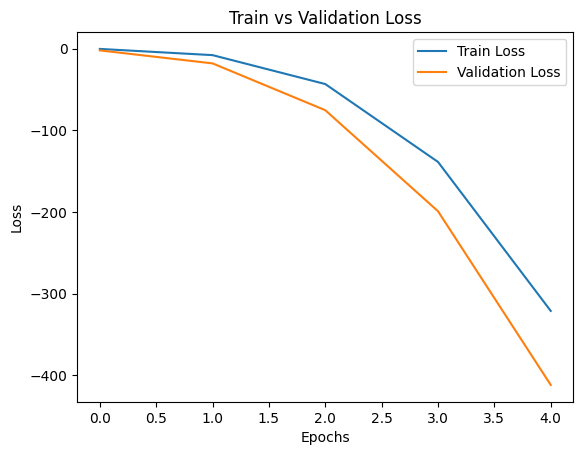

65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
ANN Modeli:
Doğruluk Skoru: 0.7447535383113714
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.74      1.00      0.85      1526
           2       0.00      0.00      0.00       477
           3       0.00      0.00      0.00        40

    accuracy                           0.74      2049
   macro avg       0.19      0.25      0.21      2049
weighted avg       0.55      0.74      0.64      2049

Confusion Matrix:
[[   0    6    0    0]
 [   0 1526    0    0]
 [   0  477    0    0]
 [   0   40    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics

# ANN Modeli
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Modeli derle
ann_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[metrics.AUC(), 'accuracy'])

# Modeli eğitim verisiyle eğit
history = ann_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Eğitim ve doğrulama kayıplarını görselleştir
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test verisiyle tahmin yap
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int)

# Sonuçları değerlendirme
ann_acc, ann_precision, ann_recall, ann_f1 = get_classification_metrics(y_test, y_pred_ann)

print("ANN Modeli:") 
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred_ann))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_ann))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics

# PCA İşlemini Gerçekleştirme
def apply_pca(X, n_components=50):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X.toarray())  # Sparse matris yoğun matrise çevrildi
    return X_reduced

# Performans Değerlendirme Fonksiyonu
def get_classification_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return acc, prec, rec, f1

# Veriyi Okuma ve Ön İşleme
data = pd.read_csv("data_cleaned.csv")
X = data['cleaned_tweet']
y = data['Etiket']

# Vektörleştirme
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Label Encoding
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# PCA Uygulaması
X_train_pca = apply_pca(X_train, n_components=50)  # 50 boyuta indiriyoruz
X_test_pca = apply_pca(X_test, n_components=50)

# ANN Modeli Oluşturma
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train_pca.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Modeli Derleme
ann_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[metrics.AUC(), 'accuracy'])

# Modeli Eğitim Verisiyle Eğitme
history = ann_model.fit(X_train_pca, y_train, epochs=10, batch_size=64, validation_data=(X_test_pca, y_test))

# Eğitim ve Doğrulama Kayıplarını Görselleştirme
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test Verisiyle Tahmin
y_pred_ann = (ann_model.predict(X_test_pca) > 0.5).astype(int)

# Performans Sonuçları
ann_acc, ann_precision, ann_recall, ann_f1 = get_classification_metrics(y_test, y_pred_ann)

print("\nANN Modeli Performans Sonuçları:")
print("Doğruluk Skoru:", ann_acc)
print("Hassasiyet (Precision):", ann_precision)
print("Duyarlılık (Recall):", ann_recall)
print("F1-Skoru:", ann_f1)

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_ann))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['GBM', 'XGBoost', 'Random Forest', 'CatBoost', 'ANN'],
    'Accuracy': [gbm_acc, xgb_acc, rf_acc, catboost_acc, ann_acc],
    'Precision': [gbm_precision, xgb_precision, rf_precision, catboost_precision, ann_precision],
    'Recall': [gbm_recall, xgb_recall, rf_recall, catboost_recall, ann_recall],
    'F1-Score': [gbm_f1, xgb_f1, rf_f1, catboost_f1, ann_f1]
})

styled_df = results_df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'green'), ('border', '1px solid black')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
    {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
])

# show all results
styled_df


,Model,Accuracy,Precision,Recall,F1-Score
0,GBM,0.792094,0.793933,0.792094,0.744638
1,XGBoost,0.820888,0.815703,0.820888,0.792804
2,Random Forest,0.786725,0.787473,0.786725,0.724908
3,CatBoost,0.744754,0.554658,0.744754,0.635801
4,ANN,0.744754,0.554658,0.744754,0.635801


## ML Models + TruncatedSVD

In [19]:
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

# X_tfidf zaten sparse formatta olabilir, bu yüzden toarray() kullanmayın
X_sparse = csr_matrix(X_tfidf)  # Eğer zaten sparse formatta değilse, bunu sparse formata çevirin

# TruncatedSVD uygulaması (PCA'ya alternatif)
svd = TruncatedSVD(n_components=4, random_state=42)  # PCA yerine TruncatedSVD
X_svd = svd.fit_transform(X_sparse)  # Sparse veriyi doğrudan TruncatedSVD'ye veriyoruz

# Eğitim ve test setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)

print("X_train boyutu:", X_train.shape)
print("y_train boyutu:", y_train.shape)


X_train boyutu: (8196, 4)
y_train boyutu: (8196,)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest Modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Sonuçları hesaplama
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest - Accuracy: {rf_acc}, Precision: {rf_precision}, Recall: {rf_recall}, F1-Score: {rf_f1}")


Random Forest - Accuracy: 0.7457296242069302, Precision: 0.6892965795762793, Recall: 0.7457296242069302, F1-Score: 0.6973449655954403


c:\Users\Baki Akgun\New Folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Modeli
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)

# Sonuçları hesaplama
gbm_acc = accuracy_score(y_test, y_pred_gbm)
gbm_precision = precision_score(y_test, y_pred_gbm, average='weighted')
gbm_recall = recall_score(y_test, y_pred_gbm, average='weighted')
gbm_f1 = f1_score(y_test, y_pred_gbm, average='weighted')

print(f"Gradient Boosting - Accuracy: {gbm_acc}, Precision: {gbm_precision}, Recall: {gbm_recall}, F1-Score: {gbm_f1}")


Gradient Boosting - Accuracy: 0.7447535383113714, Precision: 0.6868624835473158, Recall: 0.7447535383113714, F1-Score: 0.6696604745336399


In [34]:

# XGBoost Modeli
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Sonuçları hesaplama
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb, average='weighted')
xgb_recall = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"XGBoost - Accuracy: {xgb_acc}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1-Score: {xgb_f1}")


XGBoost - Accuracy: 0.7447535383113714, Precision: 0.680916183425665, Recall: 0.7447535383113714, F1-Score: 0.6839036825964248


c:\Users\Baki Akgun\New Folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from catboost import CatBoostClassifier

# CatBoost Modeli
catboost_model = CatBoostClassifier(iterations=20, learning_rate=0.05, depth=10, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

# Sonuçları hesaplama
catboost_acc = accuracy_score(y_test, y_pred_catboost)
catboost_precision = precision_score(y_test, y_pred_catboost, average='weighted')
catboost_recall = recall_score(y_test, y_pred_catboost, average='weighted')
catboost_f1 = f1_score(y_test, y_pred_catboost, average='weighted')

print(f"CatBoost - Accuracy: {catboost_acc}, Precision: {catboost_precision}, Recall: {catboost_recall}, F1-Score: {catboost_f1}")


CatBoost - Accuracy: 0.7481698389458272, Precision: 0.714865692494665, Recall: 0.7481698389458272, F1-Score: 0.6418559714915036


c:\Users\Baki Akgun\New Folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
from sklearn.preprocessing import LabelEncoder

# Hedef değişkeni kodlama
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# ANN Modeli
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[metrics.AUC(), 'accuracy'])

ann_model.fit(X_train, y_train_encoded, epochs=10, batch_size=64, verbose=0)
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int).flatten()

# Sonuçları hesaplama
ann_acc = accuracy_score(y_test_encoded, y_pred_ann)
ann_precision = precision_score(y_test_encoded, y_pred_ann, average='weighted')
ann_recall = recall_score(y_test_encoded, y_pred_ann, average='weighted')
ann_f1 = f1_score(y_test_encoded, y_pred_ann, average='weighted')

print(f"ANN - Accuracy: {ann_acc}, Precision: {ann_precision}, Recall: {ann_recall}, F1-Score: {ann_f1}")


c:\Users\Baki Akgun\New Folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN - Accuracy: 0.7447535383113714, Precision: 0.5546578328273073, Recall: 0.7447535383113714, F1-Score: 0.635800782916449


c:\Users\Baki Akgun\New Folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import pandas as pd

# Sonuçları tabloya dönüştürme
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'ANN'],
    'Accuracy': [rf_acc, gbm_acc, xgb_acc, catboost_acc, ann_acc],
    'Precision': [rf_precision, gbm_precision, xgb_precision, catboost_precision, ann_precision],
    'Recall': [rf_recall, gbm_recall, xgb_recall, catboost_recall, ann_recall],
    'F1-Score': [rf_f1, gbm_f1, xgb_f1, catboost_f1, ann_f1]
})
print("Models With TruncatedSVD(instead of PCA))")
results_df


Models With TruncatedSVD(instead of PCA))


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.745730,0.689297,0.745730,0.697345
1,Gradient Boosting,0.744754,0.686862,0.744754,0.669660
2,XGBoost,0.744754,0.680916,0.744754,0.683904
3,CatBoost,0.748170,0.714866,0.748170,0.641856
4,ANN,0.744754,0.554658,0.744754,0.635801


## TextGAN Methods


### Resampling Methods



In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE ile oversampling yap
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Yeni eğitim setinin boyutuna bak
print("Oversampling sonrası eğitim seti boyutu:", X_train_smote.shape)


Oversampling sonrası eğitim seti boyutu: (24784, 213290)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling yap
undersample = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)

# Yeni eğitim setinin boyutuna bak
print("Undersampling sonrası eğitim seti boyutu:", X_train_undersample.shape)


Undersampling sonrası eğitim seti boyutu: (60, 213290)


In [ ]:
from imblearn.combine import SMOTEENN

# Kombine SMOTE + ENN (Edited Nearest Neighbors) kullanarak resampling
smote_enn = SMOTEENN(random_state=42)
X_train_combined, y_train_combined = smote_enn.fit_resample(X_train, y_train)

# Yeni eğitim setinin boyutuna bak
print("Kombine resampling sonrası eğitim seti boyutu:", X_train_combined.shape)


Kombine resampling sonrası eğitim seti boyutu: (18507, 213290)


In [ ]:
from imblearn.over_sampling import SMOTE  # For oversampling
from imblearn.under_sampling import RandomUnderSampler  # For undersampling
from imblearn.combine import SMOTEENN  # For combined oversampling and undersampling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE on the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a model on the resampled data (for example, using Random Forest)
from sklearn.ensemble import RandomForestClassifier
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred_smote = rf_model_smote.predict(X_test)
print("Accuracy on SMOTE Resampled Data:", accuracy_score(y_test, y_pred_smote))


Accuracy on SMOTE Resampled Data: 0.7974621766715471


In [ ]:
# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling on the training data
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Train a model on the resampled data (for example, using Random Forest)
rf_model_undersample = RandomForestClassifier(random_state=42)
rf_model_undersample.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred_undersample = rf_model_undersample.predict(X_test)
print("Accuracy on Undersampled Data:", accuracy_score(y_test, y_pred_undersample))


Accuracy on Undersampled Data: 0.0029282576866764276


In [ ]:
# Initialize SMOTEENN
smoteenn = SMOTEENN(sampling_strategy='auto', random_state=42)

# Apply SMOTEENN on the training data
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

# Train a model on the resampled data (for example, using Random Forest)
rf_model_smoteenn = RandomForestClassifier(random_state=42)
rf_model_smoteenn.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred_smoteenn = rf_model_smoteenn.predict(X_test)
print("Accuracy on SMOTEENN Resampled Data:", accuracy_score(y_test, y_pred_smoteenn))


Accuracy on SMOTEENN Resampled Data: 0.3191800878477306


In [ ]:
# Collect results into a DataFrame
import pandas as pd

results = {
    'Method': ['SMOTE', 'Undersampling', 'SMOTEENN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_smote),
        accuracy_score(y_test, y_pred_undersample),
        accuracy_score(y_test, y_pred_smoteenn)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)



          Method  Accuracy
0          SMOTE  0.797462
1  Undersampling  0.002928
2       SMOTEENN  0.319180


### TextGAN 


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generator
class Generator(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super(Generator, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden):
        x = self.embedding(x)
        output, hidden = self.lstm(x, hidden)
        logits = self.fc(output)
        return logits, hidden

# Discriminator
class Discriminator(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super(Discriminator, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, hidden):
        x = self.embedding(x)
        output, hidden = self.lstm(x, hidden)
        logits = self.fc(output[:, -1, :])  # Son zaman adımını kullan
        return self.sigmoid(logits), hidden

# Hiperparametreler (Model eğitimi sırasında kullandığınız değerler ile aynı olmalı)
# Eğitim sırasında kullanılan vocab_size değerini buraya yazın
vocab_size = 84585  # Eğitimde kullanılan değer
  # Örnek değer, eğitim sırasında kullanılan değerle aynı olmalı
embed_size = 128
hidden_size = 128

# Model tanımları
generator = Generator(vocab_size, embed_size, hidden_size)
discriminator = Discriminator(vocab_size, embed_size, hidden_size)

# Modelleri yükleyin
generator.load_state_dict(torch.load("C:\\Users\\Baki Akgun\\OneDrive\\Masaüstü\\Turkish_Hate_Speech_Predictor_Project\\generator.pth"))
discriminator.load_state_dict(torch.load("C:\\Users\\Baki Akgun\\OneDrive\\Masaüstü\\Turkish_Hate_Speech_Predictor_Project\\discriminator.pth"))

# Değerlendirme moduna geçin
generator.eval()
discriminator.eval()

print("Modeller başarıyla yüklendi.")

# Test Verisi ile Örnek Kullanım
with torch.no_grad():
    # Test için rastgele girdi oluştur
    test_noise = torch.randint(1, vocab_size, (1, 10))  # 1 satırlık, 10 zaman adımlı rastgele veri
    hidden = None

    # Generator kullanımı
    generated_data, _ = generator(test_noise, hidden)
    print(f"Generator Output Shape: {generated_data.shape}")  # Beklenen boyut: [1, 10, vocab_size]

    # Discriminator kullanımı
    real_output, _ = discriminator(test_noise, hidden)
    print(f"Discriminator Output Shape: {real_output.shape}")  # Beklenen boyut: [1, 1]

    # Discriminator üzerinde sahte veri testi
    fake_output, _ = discriminator(generated_data.argmax(-1), hidden)
    print(f"Fake Output from Discriminator: {fake_output}")


Modeller başarıyla yüklendi.
Generator Output Shape: torch.Size([1, 10, 84585])
Discriminator Output Shape: torch.Size([1, 1])
Fake Output from Discriminator: tensor([[0.0257]])


In [35]:
def generate_synthetic_data(generator, num_samples, sequence_length, vocab_size, device='cpu'):
    generator.eval()  # Modeli değerlendirme moduna geçir
    synthetic_data = []
    hidden = None

    with torch.no_grad():
        for _ in range(num_samples):
            noise = torch.randint(1, vocab_size, (1, sequence_length)).to(device)  # Rastgele giriş
            generated_seq, hidden = generator(noise, hidden)
            synthetic_data.append(generated_seq.argmax(-1).squeeze(0).tolist())  # Maksimum olasılıklı kelimeler
    return synthetic_data

# Azınlık sınıfı için sentetik veri üretimi
num_synthetic_samples = 500  # Üretilecek örnek sayısı
sequence_length = 10  # Tweet uzunluğu (örnek olarak 10 aldık)
synthetic_samples = generate_synthetic_data(generator, num_synthetic_samples, sequence_length, vocab_size)

# Sentetik veriyi insan tarafından okunabilir forma çevir
synthetic_texts = [" ".join([tfidf_vectorizer.get_feature_names_out()[token] for token in seq if token < len(tfidf_vectorizer.get_feature_names_out())]) for seq in synthetic_samples]

# Sentetik veriyi azınlık sınıfı etiketiyle ekleyelim
synthetic_data = pd.DataFrame({'cleaned_tweet': synthetic_texts, 'Etiket': 'minority_label'})


In [36]:
# Orijinal veri seti ile sentetik veri setini birleştirme
data_balanced = pd.concat([data_cleaned, synthetic_data], ignore_index=True)

data_balanced.to_csv('data_balanced.csv', index=False)

# Yeni veri setindeki sınıf dağılımını kontrol edelim
print(data_balanced['Etiket'].value_counts())


Etiket
hiçbiri           7722
nefret            2336
minority_label     500
saldırgan          166
Etiket              21
Name: count, dtype: int64


In [37]:
from sklearn.model_selection import train_test_split

# Eğitim ve test setlerine ayırma
X_balanced = tfidf_vectorizer.fit_transform(data_balanced['cleaned_tweet'])
y_balanced = data_balanced['Etiket']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

print("Dengelenmiş Eğitim Verisi Boyutu:", X_train_balanced.shape)
print("Dengelenmiş Test Verisi Boyutu:", X_test_balanced.shape)


Dengelenmiş Eğitim Verisi Boyutu: (8596, 217801)
Dengelenmiş Test Verisi Boyutu: (2149, 217801)


In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [41]:
# Özellikler (X) ve etiketler (y) için TF-IDF ve etiketleme
tfidf_vectorizer = TfidfVectorizer()
X_balanced = tfidf_vectorizer.fit_transform(data_balanced['cleaned_tweet'])
y_balanced = data_balanced['Etiket']

# Eğitim ve test setlerine ayırma
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)


In [44]:
# Sonuçları saklamak için bir liste
results = []

# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)
rf_pred = rf_model.predict(X_test_balanced)

rf_accuracy = accuracy_score(y_test_balanced, rf_pred)
rf_recall = recall_score(y_test_balanced, rf_pred, average='weighted')  # 'binary' yerine 'weighted'
rf_f1 = f1_score(y_test_balanced, rf_pred, average='weighted')  # 'binary' yerine 'weighted'

results.append({
    'Model': 'Random Forest',
    'Accuracy': rf_accuracy,
    'Recall': rf_recall,
    'F1 Score': rf_f1
})


In [46]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Model Evaluation
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_balanced, y_train_balanced)
gbm_pred = gbm_model.predict(X_test_balanced)

# Accuracy
gbm_accuracy = accuracy_score(y_test_balanced, gbm_pred)

# Recall and F1 Score with weighted average
gbm_recall = recall_score(y_test_balanced, gbm_pred, average='weighted')
gbm_f1 = f1_score(y_test_balanced, gbm_pred, average='weighted')

# Store results
results.append({
    'Model': 'Gradient Boosting',
    'Accuracy': gbm_accuracy,
    'Recall': gbm_recall,
    'F1 Score': gbm_f1
})

# Display results
print(f"Accuracy: {gbm_accuracy:.4f}")
print(f"Recall: {gbm_recall:.4f}")
print(f"F1 Score: {gbm_f1:.4f}")


Accuracy: 0.7725
Recall: 0.7725
F1 Score: 0.7214


In [47]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

# Model Evaluation for ANN
ann_model = MLPClassifier(random_state=42)
ann_model.fit(X_train_balanced, y_train_balanced)
ann_pred = ann_model.predict(X_test_balanced)

# Accuracy
ann_accuracy = accuracy_score(y_test_balanced, ann_pred)

# Recall and F1 Score with weighted average for multiclass
ann_recall = recall_score(y_test_balanced, ann_pred, average='weighted')
ann_f1 = f1_score(y_test_balanced, ann_pred, average='weighted')

# Store results
results.append({
    'Model': 'ANN',
    'Accuracy': ann_accuracy,
    'Recall': ann_recall,
    'F1 Score': ann_f1
})

# Display results
print(f"Accuracy: {ann_accuracy:.4f}")
print(f"Recall: {ann_recall:.4f}")
print(f"F1 Score: {ann_f1:.4f}")


Accuracy: 0.8167
Recall: 0.8167
F1 Score: 0.7950


In [48]:

# Sonuçları DataFrame'e dönüştürme
results_df = pd.DataFrame(results)

# Sonuçları yazdırma
results_df

,Model,Accuracy,Recall,F1 Score
0,Random Forest,0.775710,0.775710,0.719233
1,Gradient Boosting,0.772452,0.772452,0.721353
2,ANN,0.816659,0.816659,0.795025


In [49]:
from imblearn.over_sampling import RandomOverSampler

# Oversampling için RandomOverSampler kullanımı
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_balanced, y_train_balanced)

print("Orijinal Eğitim Veri Seti Boyutu:", X_train_balanced.shape)
print("Oversampling sonrası Eğitim Veri Seti Boyutu:", X_train_resampled.shape)


Orijinal Eğitim Veri Seti Boyutu: (8596, 51842)
Oversampling sonrası Eğitim Veri Seti Boyutu: (30875, 51842)


In [50]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling için RandomUnderSampler kullanımı
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_balanced, y_train_balanced)

print("Orijinal Eğitim Veri Seti Boyutu:", X_train_balanced.shape)
print("Undersampling sonrası Eğitim Veri Seti Boyutu:", X_train_resampled.shape)


Orijinal Eğitim Veri Seti Boyutu: (8596, 51842)
Undersampling sonrası Eğitim Veri Seti Boyutu: (85, 51842)
